In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random

In [2]:
seed = 1234
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
path = "Downloads/Crop Yiled with Soil and Weather.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Fertilizer,temp,N,P,K,yeild
0,80.0,28.0,80.0,24.0,20.0,12.0
1,77.0,27.0,78.0,23.0,20.0,12.0
2,80.0,26.0,80.0,24.0,20.0,12.0
3,80.0,28.0,80.0,24.0,20.0,12.0
4,78.0,27.0,78.0,23.0,19.0,12.0


In [5]:
df.tail()

,Fertilizer,temp,N,P,K,yeild
2591,78.942684,27.014634,76.838312,23.087606,20.044206,10.348503
2592,79.077362,27.153127,76.927657,23.068234,20.155436,10.528122
2593,78.986271,28.108948,77.164352,22.863654,20.989871,10.564205
2594,78.894767,28.141344,76.925149,23.071553,20.873662,10.442511
2595,79.050307,26.980865,77.124758,23.050197,19.960695,10.584638


In [6]:
#sanity check

In [7]:
df.shape

(2596, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB


In [9]:
#find missing value
df.isnull().sum()

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64

In [10]:
#missing value percentage
df.isnull().sum()/df.shape[0]*100

Fertilizer    0.0
temp          0.0
N             0.0
P             0.0
K             0.0
yeild         0.0
dtype: float64

In [11]:
#find duplicates
df.duplicated().sum()

np.int64(11)

In [12]:
#Exploratory Data Analysis

In [13]:
df.describe()

,Fertilizer,temp,N,P,K,yeild
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,66.487433,33.848237,69.522900,20.708194,17.806268,8.533832
std,9.747669,5.371279,6.802806,1.973419,1.940037,1.938789
min,49.751436,23.771310,58.839466,17.723223,14.704883,5.150745
25%,59.865423,28.000000,64.834635,18.988224,15.975932,6.929404
50%,65.011969,36.965121,69.894076,20.889579,18.061975,8.501720
75%,76.943112,38.928914,76.845919,22.125618,19.133858,10.045179
max,80.223893,40.272480,80.218705,25.162178,22.064666,12.337651


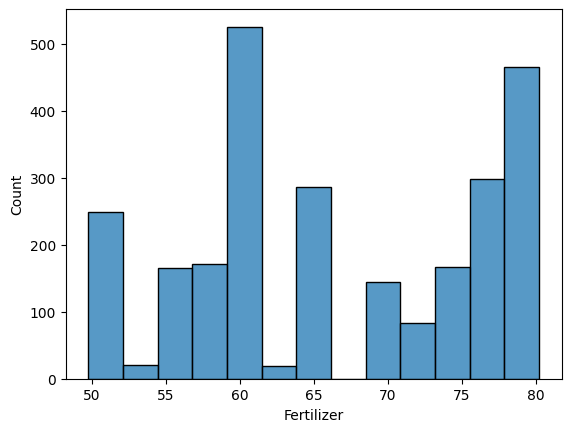

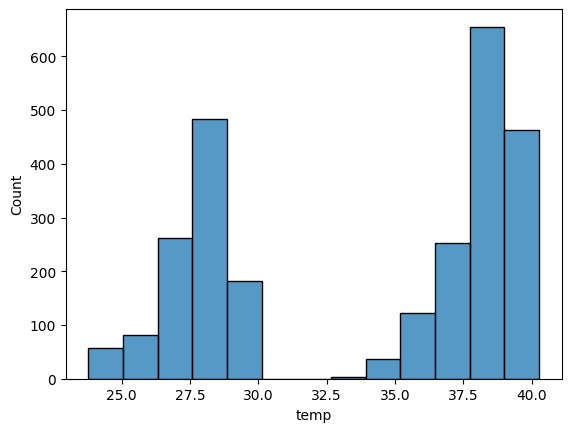

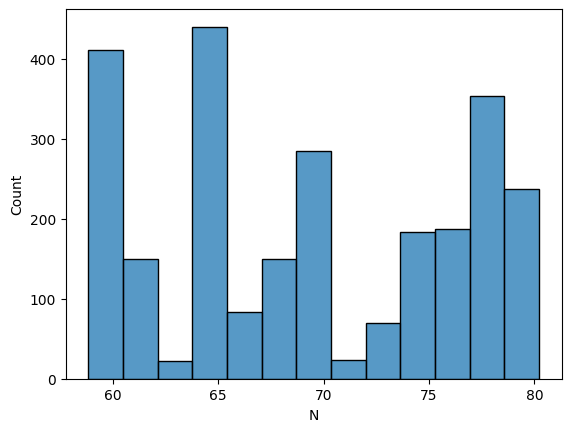

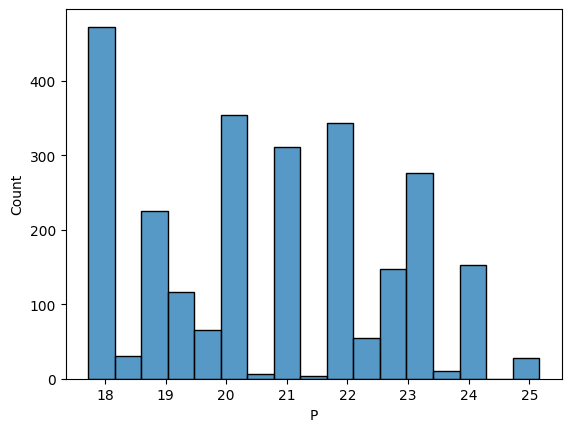

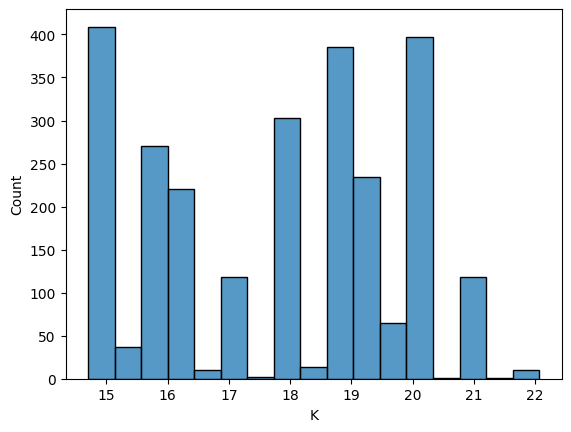

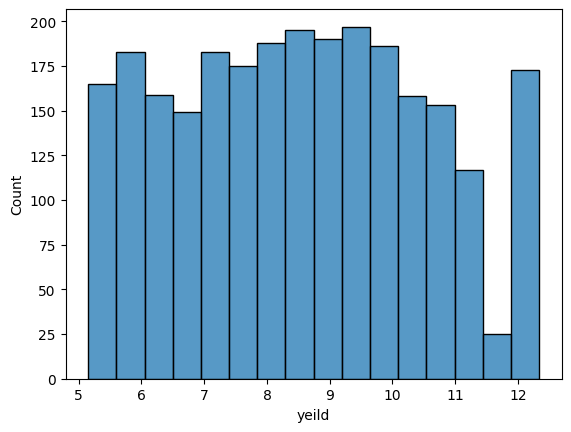

In [14]:
#histogram for understanding distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

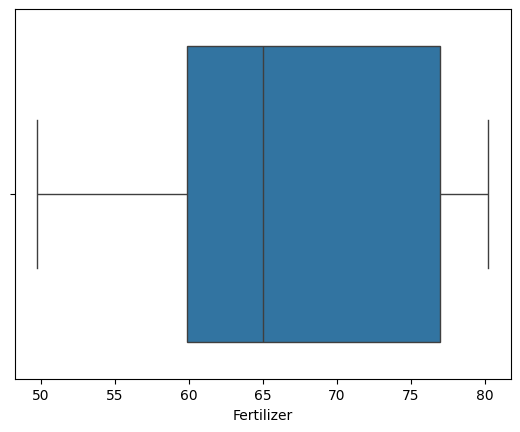

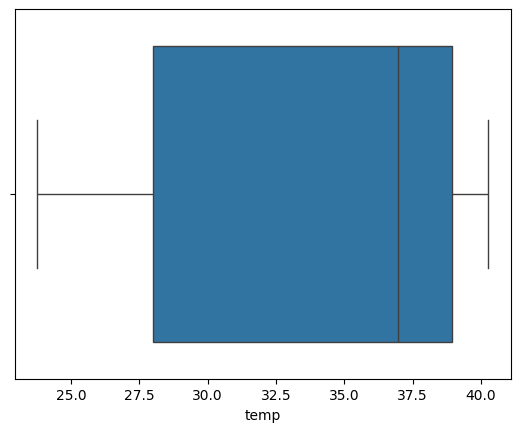

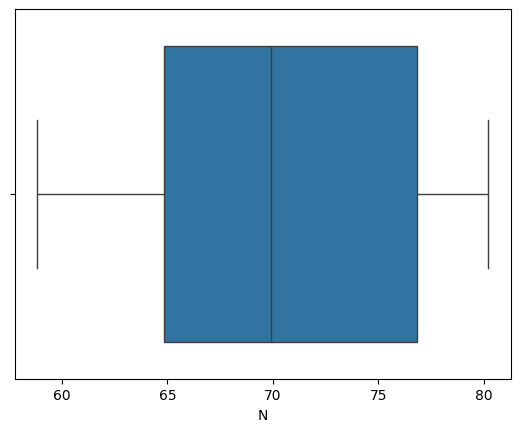

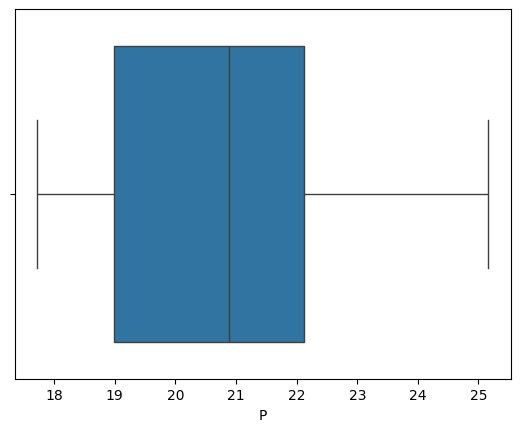

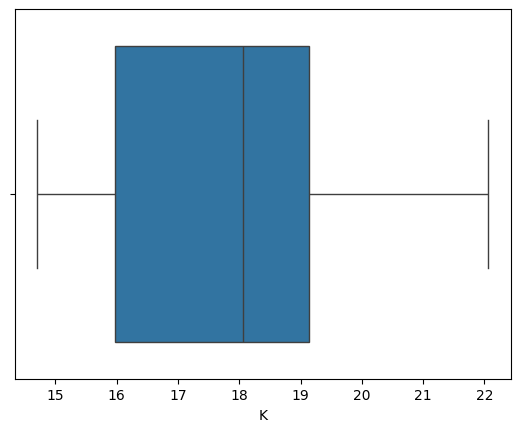

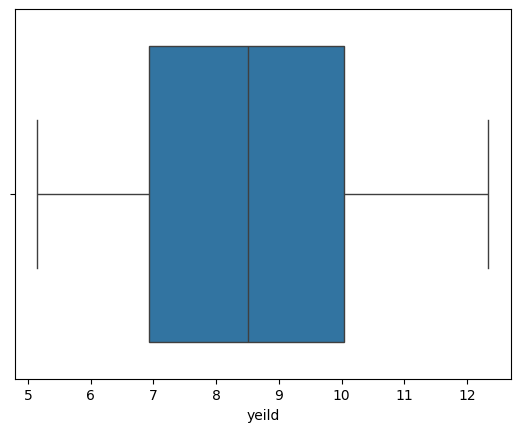

In [15]:
#boxplot-to-identify Outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [16]:
#scatter plot to understand the relationship

In [17]:
df.select_dtypes(include="number").columns

Index(['Fertilizer', 'temp', 'N', 'P', 'K', 'yeild'], dtype='object')

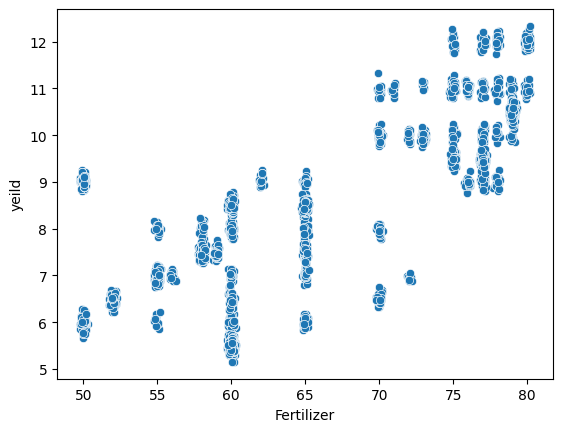

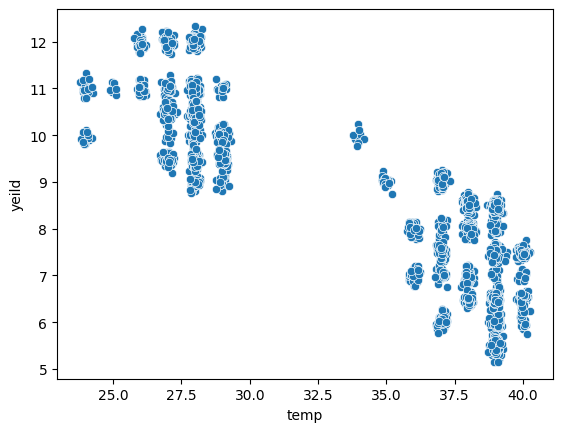

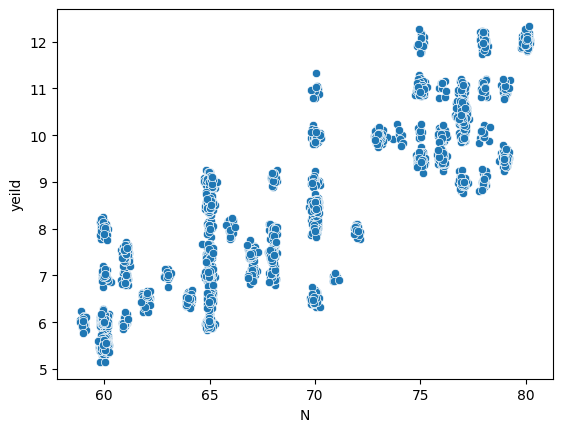

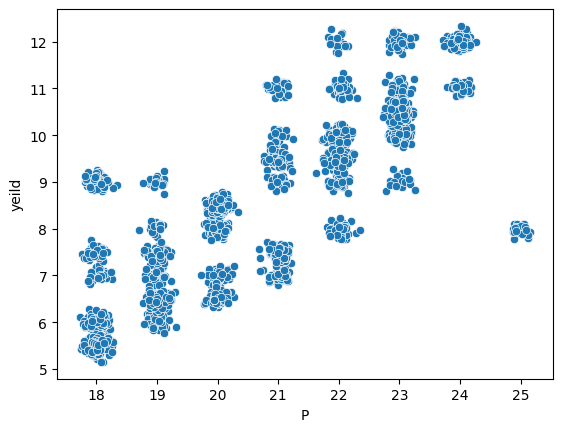

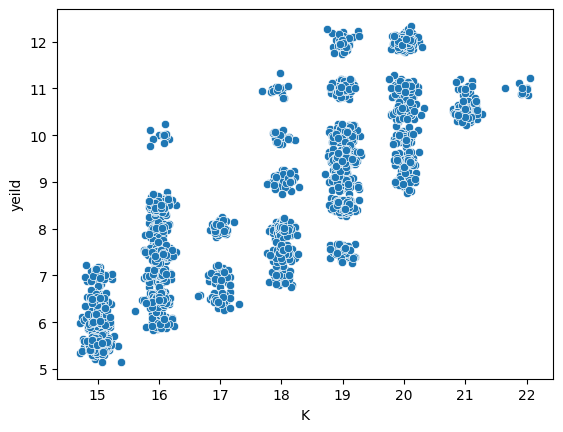

In [18]:
for i in ['Fertilizer', 'temp', 'N', 'P', 'K']:
    sns.scatterplot(data=df,x=i,y='yeild')
    plt.show()

In [19]:
#correlation 

In [20]:
df.corr()

,Fertilizer,temp,N,P,K,yeild
Fertilizer,1.000000,-0.866038,0.895809,0.826223,0.764377,0.796501
temp,-0.866038,1.000000,-0.860435,-0.804044,-0.780743,-0.864923
N,0.895809,-0.860435,1.000000,0.810927,0.826196,0.877295
P,0.826223,-0.804044,0.810927,1.000000,0.801597,0.831031
K,0.764377,-0.780743,0.826196,0.801597,1.000000,0.855162
yeild,0.796501,-0.864923,0.877295,0.831031,0.855162,1.000000


<Axes: >

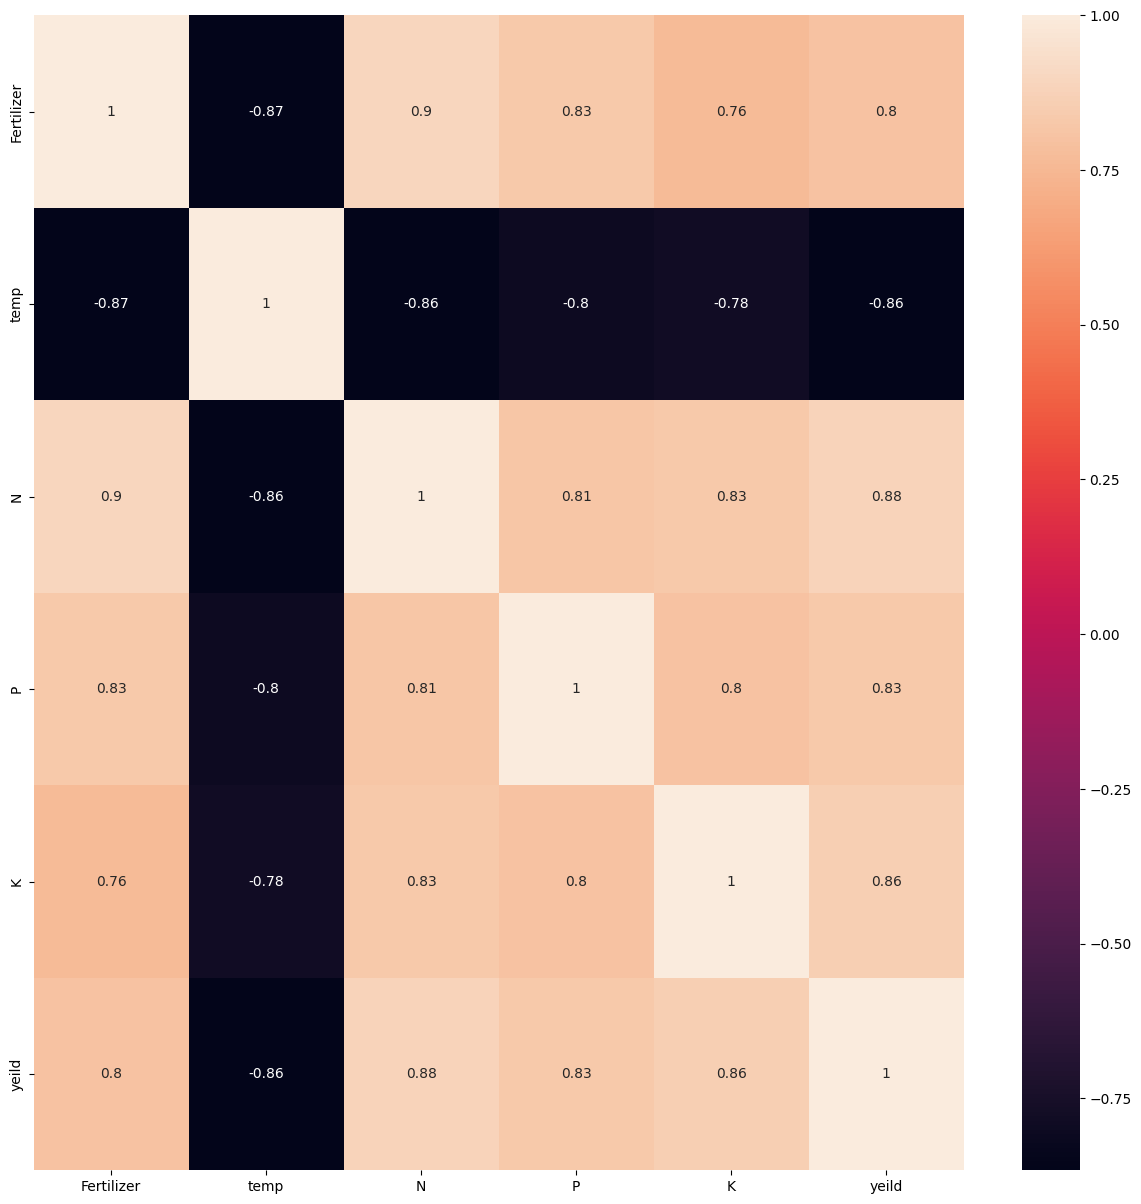

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [22]:
#no missing value
#no outliers
#drop duplicates
df.drop_duplicates()

,Fertilizer,temp,N,P,K,yeild
0,80.000000,28.000000,80.000000,24.000000,20.000000,12.000000
1,77.000000,27.000000,78.000000,23.000000,20.000000,12.000000
2,80.000000,26.000000,80.000000,24.000000,20.000000,12.000000
4,78.000000,27.000000,78.000000,23.000000,19.000000,12.000000
6,75.000000,26.000000,75.000000,22.000000,19.000000,12.000000
...,...,...,...,...,...,...
2591,78.942684,27.014634,76.838312,23.087606,20.044206,10.348503
2592,79.077362,27.153127,76.927657,23.068234,20.155436,10.528122
2593,78.986271,28.108948,77.164352,22.863654,20.989871,10.564205
2594,78.894767,28.141344,76.925149,23.071553,20.873662,10.442511


In [23]:
X = df[['Fertilizer','temp','N','P','K']]
y = df['yeild']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64,name = "L1",activation = "relu"),
        tf.keras.layers.Dense(32,name = "L2",activation = "relu"),
        tf.keras.layers.Dense(1,name = "L3"),
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [26]:
model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 67.1358 - val_loss: 22.7084
Epoch 2/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0355 - val_loss: 6.1081
Epoch 3/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5095 - val_loss: 4.3099
Epoch 4/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8099 - val_loss: 2.9543
Epoch 5/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5638 - val_loss: 2.0884
Epoch 6/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8230 - val_loss: 1.5929
Epoch 7/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4072 - val_loss: 1.3133
Epoch 8/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1708 - val_loss: 1.1260
Epoch 9/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0078 - val_loss: 0.9880
Epoch 10/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8895 - val_loss: 0.8837
Epoch 11/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8021 - val_loss: 0.8026
Epoch 12/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [27]:
y_predict = model.predict(X_test_scaled)
mse = mean_squared_error(y_predict, y_test)
r2_test = r2_score(y_test, y_predict)

print(f"MSE score:{mse:.4f},r2 score:{r2_test:.3f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE score:0.0826,r2 score:0.978
